In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
from sklearn.ensemble import RandomForestRegressor


In [184]:
# Load data
data = pd.read_parquet("Data/DSB_BDK_trainingset.parquet")

In [185]:
data = pd.read_csv('Data/Cleaned_data.csv')

In [186]:
data

,visualiseringskode_1.0,visualiseringskode_2.0,visualiseringskode_3.0,visualiseringskode_4.0,visualiseringskode_5.0,visualiseringskode_6.0,visualiseringskode_7.0,visualiseringskode_8.0,visualiseringskode_9.0,visualiseringskode_10.0,...,dsb_tgf_relative_sygdom,dsb_lkf_fte,dsb_lkf_sygdom,dsb_lkf_relative_sygdom,dsb_haandvaerker,dsb_fravaer,dsb_relative_fravaer,mean_temp,mean_wind_speed,acc_precip
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.146547,0.000000,0.000000,0.692884,0.068160,0.076218,0.382979,0.140541,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.146547,0.000000,0.000000,0.692884,0.068160,0.076218,0.382979,0.140541,0.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.146547,0.000000,0.000000,0.692884,0.068160,0.076218,0.382979,0.140541,0.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.095326,0.404108,0.036875,0.015014,0.692884,0.068160,0.076218,0.401596,0.118919,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.095326,0.404108,0.036875,0.015014,0.692884,0.068160,0.076218,0.401596,0.118919,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.062961,0.040156,0.104939,0.734082,0.099190,0.063604,0.489362,0.259459,0.123711
197045,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.155368,0.221449,0.042439,0.031532,0.734082,0.099190,0.063604,0.465426,0.194595,0.064801
197046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.026204,0.210594,0.043277,0.033812,0.734082,0.099190,0.063604,0.492021,0.227027,0.106038
197047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.026204,0.210594,0.043277,0.033812,0.734082,0.099190,0.063604,0.492021,0.227027,0.106038


In [165]:
combinations = data[['visualiseringskode', 'station']].drop_duplicates().values
for strækning, station in combinations:
    print(data[(data['visualiseringskode'] == strækning) & (data['station'] == station)].shape)

(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)
(2557, 209)


In [166]:
import ast

string_tuple = '(1,0)'
tuple_result = ast.literal_eval(string_tuple)

best_model_parameters = {}
model_params_sarima = pd.read_csv('Data/Best_model_parameters_SARIMA_strækning_station.csv')
list(model_params_sarima.items())
for i in range(model_params_sarima.shape[0]):
    tuple_result = ast.literal_eval(model_params_sarima['Key'][i])
    list_result = ast.literal_eval(model_params_sarima['Values'][i])
    best_model_parameters[tuple_result] = list_result

In [167]:
best_model_parameters

{(1, 0): [(1, 1, 1), (0, 0, 0, 0)],
 (2, 0): [(3, 1, 5), (0, 0, 0, 0)],
 (1, 1): [(0, 1, 2), (0, 0, 0, 0)],
 (2, 2): [(1, 1, 1), (0, 0, 0, 0)],
 (9, 2): [(1, 1, 3), (0, 0, 0, 0)],
 (10, 3): [(1, 1, 3), (0, 0, 0, 0)],
 (24, 3): [(2, 1, 1), (0, 0, 0, 0)],
 (21, 4): [(1, 1, 1), (0, 0, 0, 0)],
 (10, 5): [(5, 1, 2), (0, 0, 0, 0)],
 (8, 5): [(0, 1, 2), (0, 0, 0, 0)],
 (11, 6): [(1, 1, 3), (0, 0, 0, 0)],
 (13, 6): [(1, 1, 3), (0, 0, 0, 0)],
 (9, 6): [(1, 1, 1), (0, 0, 0, 0)],
 (1, 7): [(1, 1, 1), (0, 0, 0, 0)],
 (2, 8): [(1, 1, 1), (0, 0, 0, 0)],
 (20, 9): [(0, 1, 2), (0, 0, 0, 0)],
 (1, 10): [(1, 1, 1), (0, 0, 0, 0)],
 (17, 11): [(2, 1, 3), (0, 0, 0, 0)],
 (28, 12): [(1, 1, 3), (0, 0, 0, 0)],
 (5, 12): [(0, 1, 2), (0, 0, 0, 0)],
 (5, 13): [(1, 1, 1), (0, 0, 0, 0)],
 (6, 13): [(1, 1, 1), (0, 0, 0, 0)],
 (7, 13): [(0, 1, 2), (0, 0, 0, 0)],
 (19, 14): [(1, 1, 1), (0, 0, 0, 0)],
 (17, 15): [(0, 1, 2), (0, 0, 0, 0)],
 (11, 16): [(1, 1, 3), (0, 0, 0, 0)],
 (19, 17): [(0, 1, 2), (0, 0, 0, 0)],
 (20

In [168]:
def custom_cross_val_predict(estimator, y, X=None, cv=None, verbose=0, averaging="mean", return_raw_predictions=False, initial=2555):
    """Generate cross-validated estimates for each input data point
    
    Parameters
    ----------
    estimator : tuple
        A tuple containing two estimators. The first estimator should be the ARIMA model
        and the second one should be the Random Forest model.

    y : array-like or iterable, shape=(n_samples,)
        The time-series array.

    X : array-like, shape=[n_obs, n_vars], optional (default=None)
        An optional 2-d array of exogenous variables.

    cv : BaseTSCrossValidator or None, optional (default=None)
        An instance of cross-validation. If None, will use a RollingForecastCV.
        Note that for cross-validation predictions, the CV step cannot exceed
        the CV horizon, or there will be a gap between fold predictions.

    verbose : integer, optional
        The verbosity level.

    averaging : str or callable, one of ["median", "mean"] (default="mean")
        Unlike normal CV, time series CV might have different folds (windows)
        forecasting the same time step. After all forecast windows are made,
        we build a matrix of y x n_folds, populating each fold's forecasts like
        so::

            nan nan nan  # training samples
            nan nan nan
            nan nan nan
            nan nan nan
              1 nan nan  # test samples
              4   3 nan
              3 2.5 3.5
            nan   6   5
            nan nan   4

        We then average each time step's forecasts to end up with our final
        prediction results.

    return_raw_predictions : bool (default=False)
        If True, raw predictions are returned instead of averaged ones.
        This results in a y x h matrix. For example, if h=3, and step=1 then:

            nan nan nan # training samples
            nan nan nan
            nan nan nan
            nan nan nan
            1   4   2   # test samples
            2   5   7
            8   9   1
            nan nan nan
            nan nan nan

        First column contains all one-step-ahead-predictions, second column all
        two-step-ahead-predictions etc. Further metrics can then be calculated
        as desired.

    Returns
    -------
    predictions : array-like, shape=(n_samples,)
        The predicted values.

    """

    def indexable(*iterables):
        """Internal utility to handle input types"""
        results = []
        for iterable in iterables:
            if not hasattr(iterable, "__iter__"):
                raise ValueError("Input {!r} is not indexable".format(iterable))
            results.append(iterable)
        return results

    def check_cv(cv, initial = 2555):
        """Internal utility to check cv"""
        if cv is None:
            from pmdarima.model_selection import RollingForecastCV
            cv = RollingForecastCV(initial=initial, step=1, h=1)
        return cv

    def check_endog(y, copy=True, preserve_series=False):
        """Internal utility to check endogenous variable"""
        from pmdarima.utils import check_endog
        return check_endog(y, copy=copy, preserve_series=preserve_series)

    def _check_averaging(averaging):
        """Internal utility to check averaging"""
        if averaging == "mean":
            return np.nanmean
        elif averaging == "median":
            return np.nanmedian
        elif callable(averaging):
            return averaging
        else:
            raise ValueError("Unknown averaging method: {}".format(averaging))

    def _fit_and_predict(fold, estimator_tuple, y, X, train, test, verbose=0):
        """Internal utility to fit and predict"""
        arima_model = estimator_tuple
        # Fit ARIMA model
        arima_model.fit(y[train]) # X=X.iloc[train, :]
        # Predict with ARIMA model
        train_predictions = arima_model.predict_in_sample()
        arima_pred = arima_model.predict(n_periods=len(test))

        # Calculate residuals for RF input
        arima_residuals_train = train_predictions - y[train]

        model = xgb.XGBRegressor(objective = 'reg:absoluteerror', booster = 'gbtree', max_depth=5, steps =20, learning_rate=0.1) # 'reg:squarederror'
        # Train the model
        #model = model.fit(D_train, steps, watchlist)
        model = model.fit(X.iloc[train,:], arima_residuals_train)
        # Predict the labels of the test set
        #preds = model.predict(D_test)
        preds = model.predict(X.iloc[test,:])
        # Overall prediction residuals = pred - true <=> true = pred - residuals
        overall_pred = np.array(max(min(1, arima_pred[0] - preds), 0)) # make sure it is in [0;1]

        return overall_pred, test, np.array(arima_pred) #arima_residuals_test

    y, X = indexable(y, X)
    y = check_endog(y, copy=False, preserve_series=True)
    cv = check_cv(cv, initial)
    avgfunc = _check_averaging(averaging)

    if cv.step > cv.horizon:
        raise ValueError("CV step cannot be > CV horizon, or there will be a gap in predictions between folds")

    prediction_blocks = [
        _fit_and_predict(fold,
                         estimator,
                         y,
                         X,
                         train=train,
                         test=test,
                         verbose=verbose,)  # TODO: fit params?
        for fold, (train, test) in enumerate(cv.split(y, X))]

    pred_matrix = np.ones((y.shape[0], len(prediction_blocks))) * np.nan
    arima_pred = []
    for i, (pred_block, test_indices, arima_block) in enumerate(prediction_blocks):
        pred_matrix[test_indices, i] = pred_block
        arima_pred.append(arima_block)

    if return_raw_predictions:
        predictions = np.ones((y.shape[0], cv.horizon)) * np.nan
        for pred_block, test_indices in prediction_blocks:
            predictions[test_indices[0]] = pred_block
        return predictions

    test_mask = ~(np.isnan(pred_matrix).all(axis=1))
    predictions = pred_matrix[test_mask]



    # Calculate CV score
    cv_scores = []
    cv_scores_arima = []
    for fold, (train, test) in enumerate(cv.split(y, X)):
        fold_predictions = pred_matrix[test, fold]
        fold_score = float(abs(y[test] - fold_predictions))
        fold_arima_score = float(abs(y[test] - arima_pred[fold]))
        cv_scores.append(fold_score)
        cv_scores_arima.append(fold_arima_score)

    # Compute overall CV score
    score = np.mean(cv_scores)
    arima_score = np.mean(cv_scores_arima)

    return avgfunc(predictions, axis=1), score,  arima_score, cv_scores, cv_scores_arima


In [169]:
import warnings
warnings.filterwarnings('ignore')

results_strækning_station = {}
combinations = data[['visualiseringskode', 'station']].drop_duplicates().values
MSEs = []
MSEs_arima = []
random_state = 42
initial_start = 2500
preds = {}
cv_scores = {}

for strækning, station in combinations[:10]:
    y = data[(data['visualiseringskode'] == strækning) & (data['station'] == station)]['togpunktlighed']
    X = data[(data['visualiseringskode'] == strækning) & (data['station'] == station)].iloc[:,1:]
    arima_model = pm.arima.ARIMA(order = best_model_parameters[strækning, station][0], seasonal_order=best_model_parameters[strækning, station][1])

    pred, mse, mse_arima, cv_score, cv_score_arima = custom_cross_val_predict((arima_model), y, X, cv=None, verbose=1, averaging="mean", return_raw_predictions=False, initial=initial_start)
    # output = prediction per fold. 
    MSEs.append(mse)
    MSEs_arima.append(mse_arima)
    preds[(strækning, station)] = pred
    cv_scores[(strækning, station)] = (cv_score, cv_score_arima)
    # initial = 2457 - 100 fold, 10 combinations, n_estimators=100 -> 61 min

In [175]:
len(pred)

57

In [176]:
MSEs

[0.039033880928106474,
 0.06158239572090015,
 0.0961797549013506,
 0.039614441578848324,
 0.06903808544393171,
 0.062016582171122214,
 0.03867392100785907,
 0.054329528816959315,
 0.06957629977611074,
 0.061682216761405]

In [177]:
MSEs_arima

[0.040981827858264964,
 0.07078225320859712,
 0.1022558570528466,
 0.046756283989832954,
 0.09351739455095247,
 0.0664753645825041,
 0.04918946267386063,
 0.08292297383943771,
 0.07626217277561863,
 0.07431766638427023]

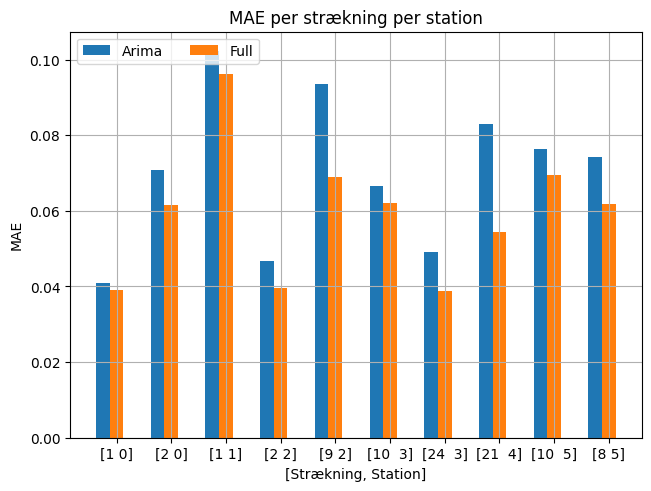

In [178]:
x = np.arange(len(MSEs))

width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in [['Arima', MSEs_arima], ['Full', MSEs]]:
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1
ax.legend(loc='upper left', ncols=2)
ax.set_xticks(x + width, combinations[:10])
ax.set_xlabel('[Strækning, Station]')
ax.set_ylabel('MAE')
ax.set_title('MAE per strækning per station')
ax.grid()
fig.savefig('Results/MAE_strækningstation_XGboost')

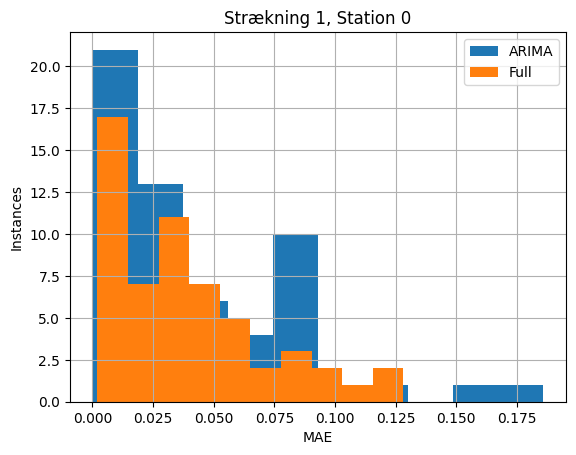

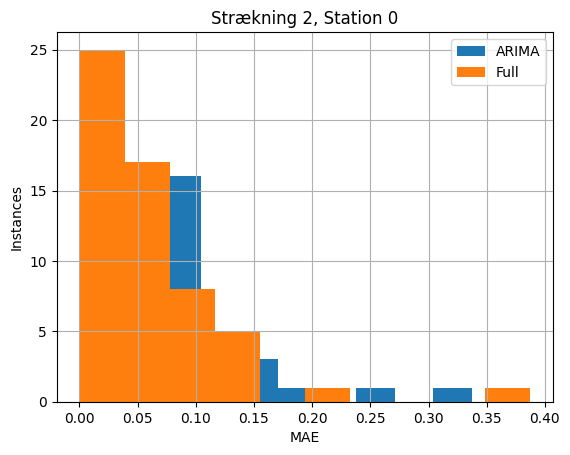

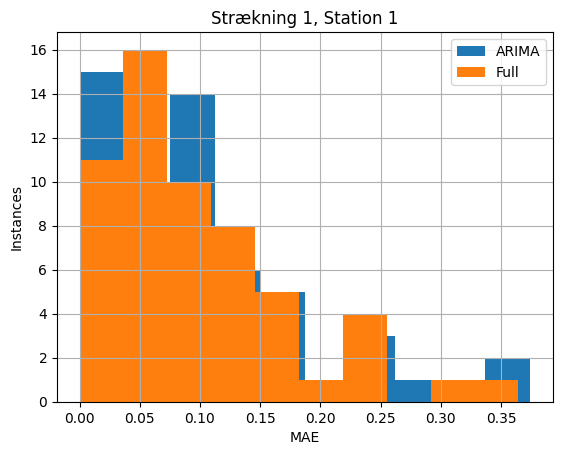

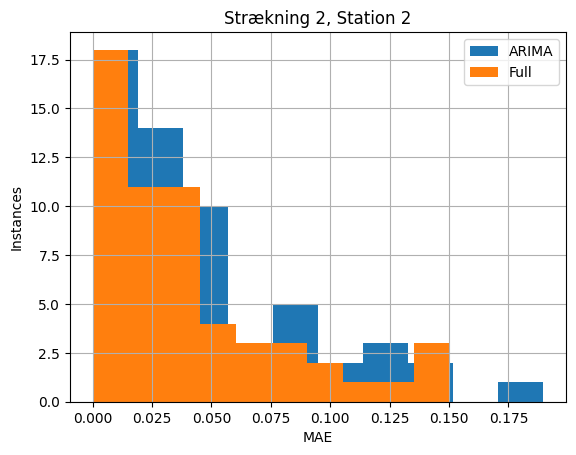

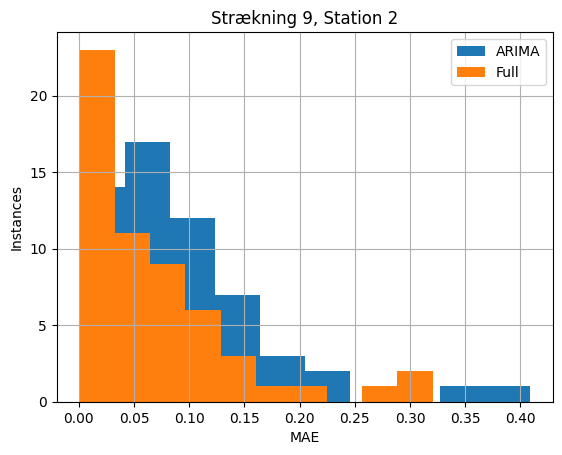

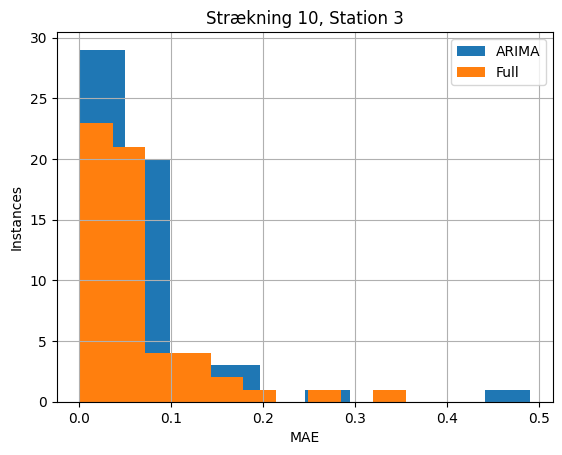

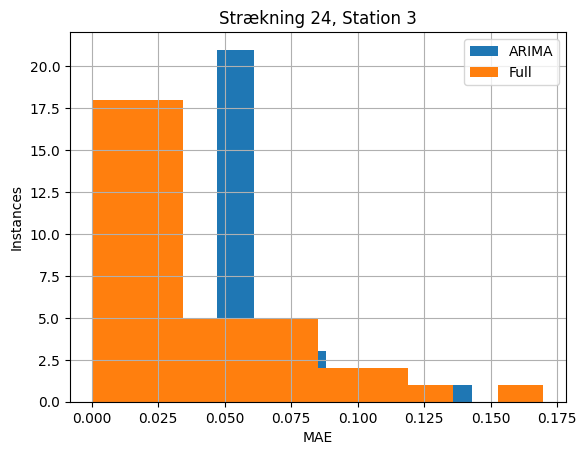

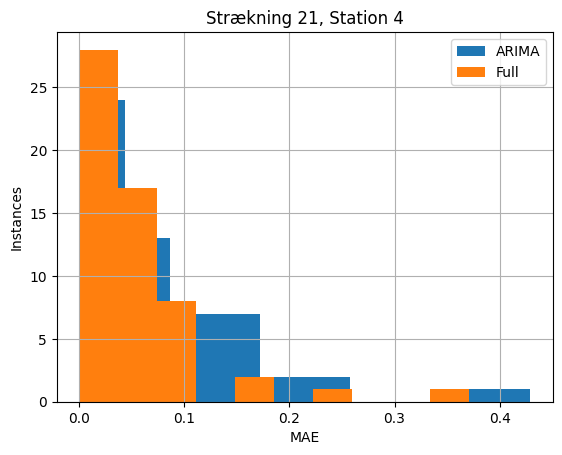

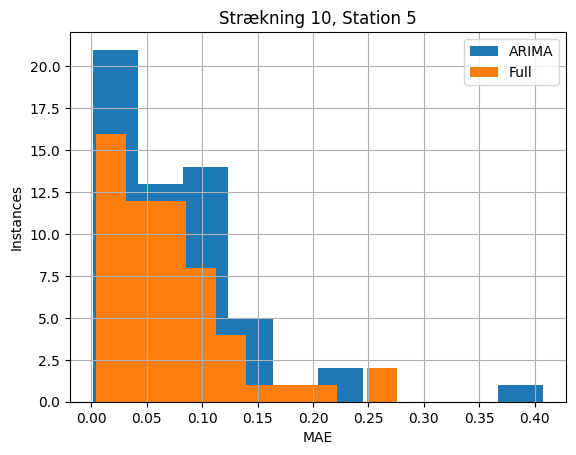

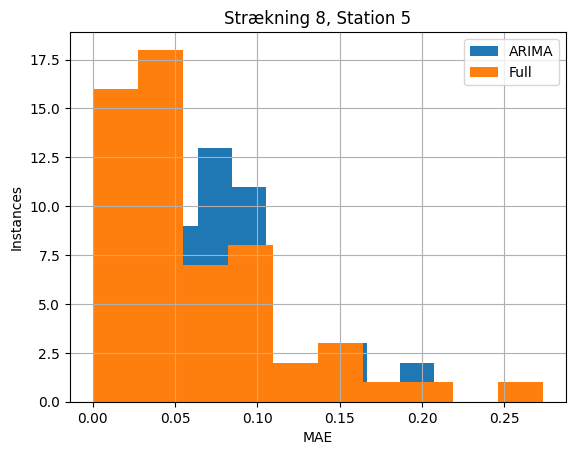

In [179]:
# Visualize absolute error for one station/strækning combination
for (strækning, station), (cv_score, cv_score_arima) in cv_scores.items():
    x = np.arange(len(cv_score))
    plt.hist(cv_score_arima, label='ARIMA')
    plt.hist(cv_score, label = 'Full')
    plt.xlabel('MAE')
    plt.ylabel('Instances')
    plt.grid()
    plt.title(f'Strækning {strækning}, Station {station}')
    plt.legend(loc = 'upper right')
    plt.show()

In [180]:
from matplotlib.ticker import MaxNLocator

def hist_strækning(strækning, cv_scores):
    cv_scores_full = [cv[0] for key, cv in cv_scores.items() if key[0] == strækning]
    cv_scores_arima = [cv[1] for key, cv in cv_scores.items() if key[0] == strækning]
    
    cv_scores_full = np.mean(cv_scores_full, axis=0)
    cv_scores_arima = np.mean(cv_scores_arima, axis=0)

    plt.hist(cv_scores_arima, label='ARIMA')
    plt.hist(cv_scores_full,label='Full')
    plt.title(f'Strækning {strækning}')
    plt.xlabel('MAE')
    plt.ylabel('Occurences')
    plt.legend(loc='upper right')
    plt.grid()
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # only integer ticks i y-axis
    plt.savefig(f'Results/Strækning{strækning}_histogram_MAE_XGboost.png', bbox_inches='tight')
    plt.show()

def linechart_strækning(strækning, cv_scores):
    cv_scores_full = [cv[0] for key, cv in cv_scores.items() if key[0] == strækning]
    cv_scores_arima = [cv[1] for key, cv in cv_scores.items() if key[0] == strækning]
    
    cv_scores_full = np.mean(cv_scores_full, axis=0)
    cv_scores_arima = np.mean(cv_scores_arima, axis=0)

    plt.plot(cv_scores_arima, label='ARIMA')
    plt.plot(cv_scores_full,label='Full')
    plt.title(f'Strækning {strækning}')
    plt.xlabel('Data points')
    plt.ylabel('MAE')
    plt.legend(loc='upper right')
    plt.grid()
    plt.savefig(f'Results/Strækning{strækning}_linechart_MAE_XGboost.png', bbox_inches='tight')
    plt.show()

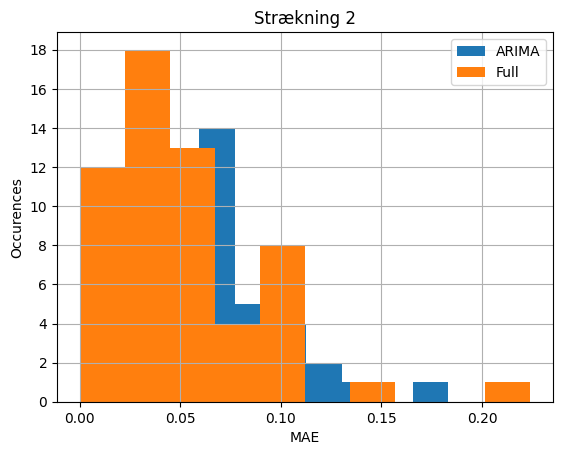

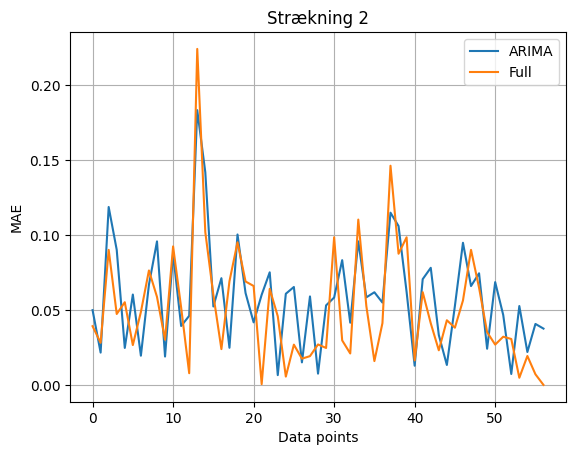

In [181]:
hist_strækning(2, cv_scores)
linechart_strækning(2, cv_scores)

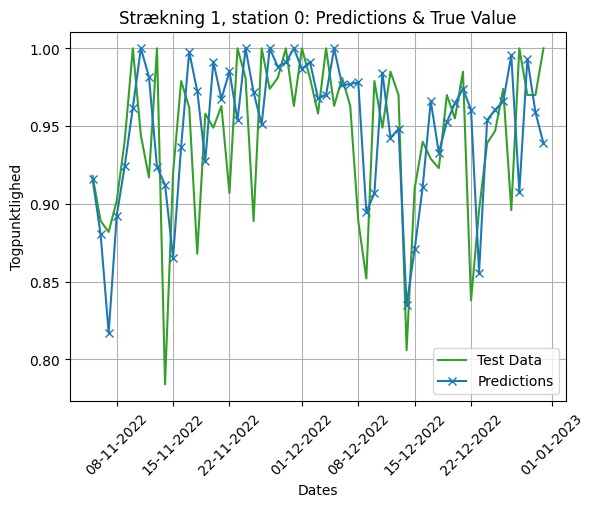

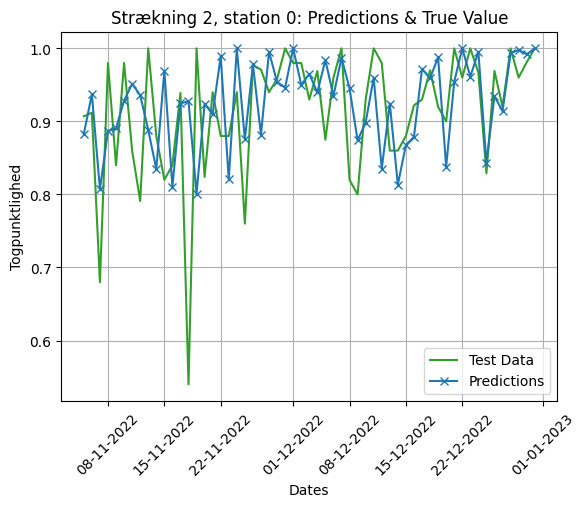

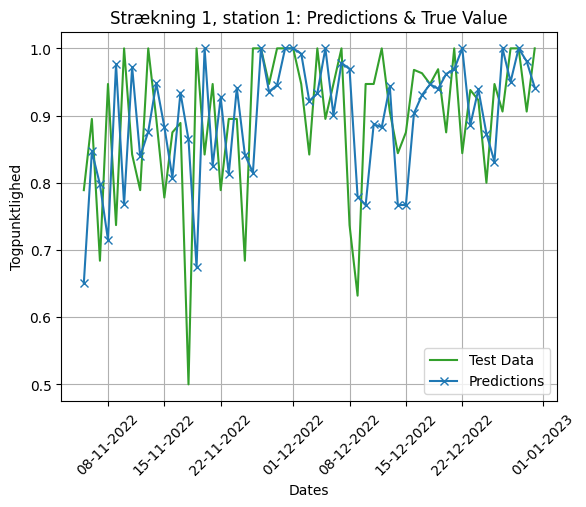

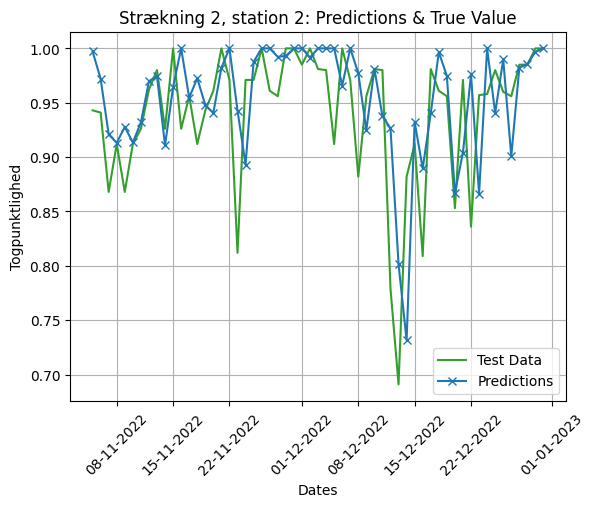

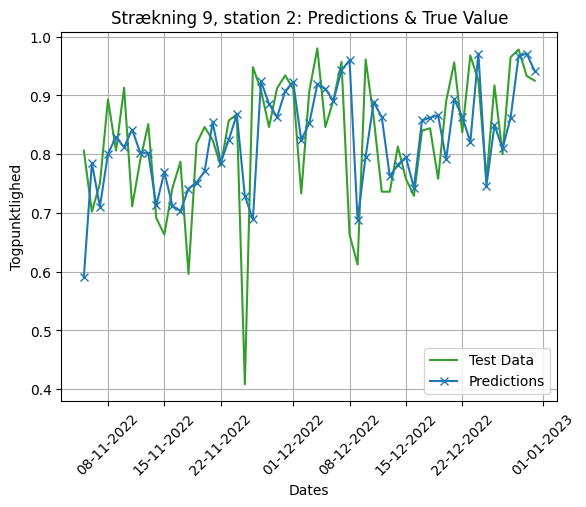

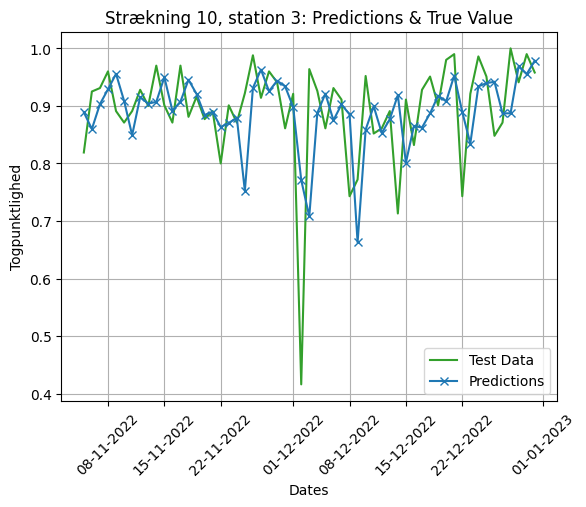

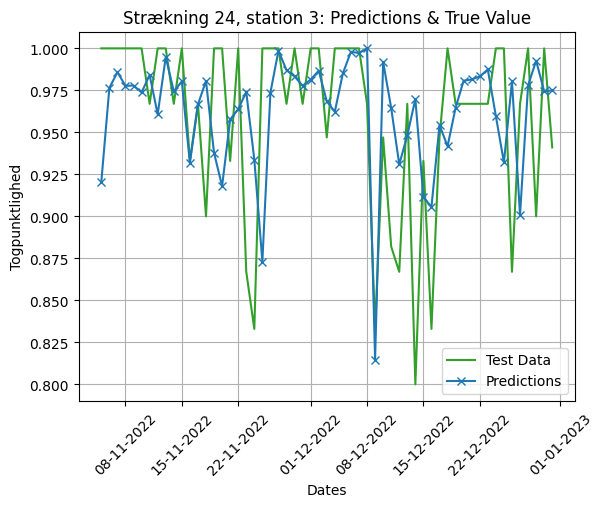

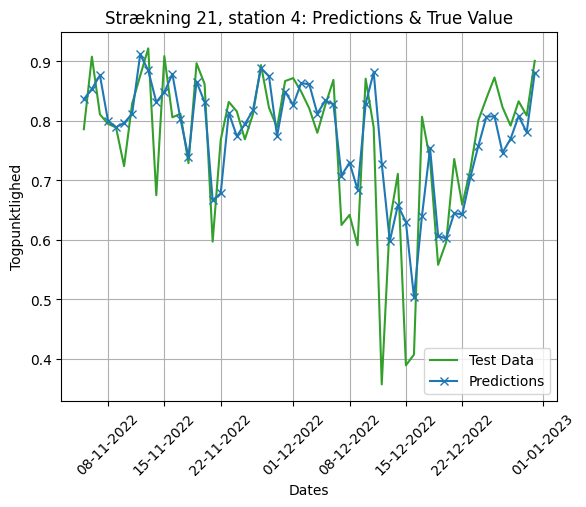

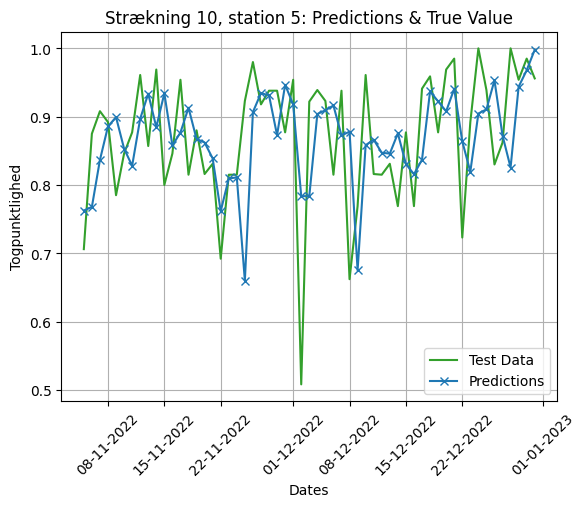

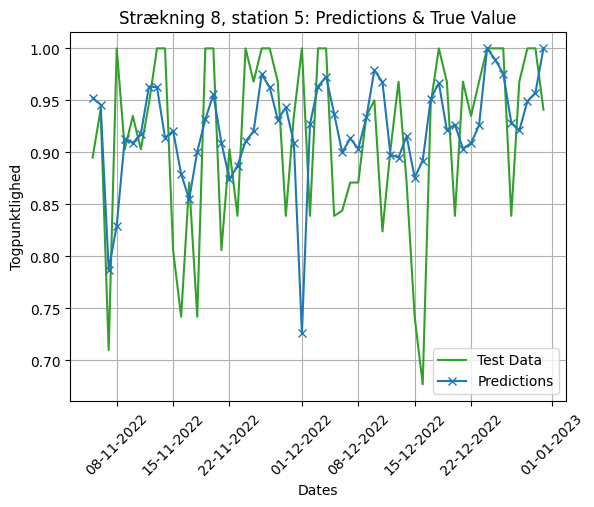

In [182]:
#Set default date format globally
plt.rcParams['date.autoformatter.day'] = '%d-%m-%Y'

for strækning, station in combinations[:10]:
    y_test = data[(data['visualiseringskode'] == strækning) & (data['station'] == station)]['togpunktlighed'][initial_start:]
    plt.plot(y_test.index, y_test, color='#33a02c', label='Test Data')
    plt.plot(y_test.index, preds[(strækning,station)], color='#1f78b4', marker='x',
                label='Predictions')
    plt.title(f'Strækning {strækning}, station {station}: Predictions & True Value')
    plt.xlabel('Dates')
    plt.ylabel('Togpunktlighed')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()